In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc4fb98f43cc0a6ce9f30cbd72ac49ea


In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

gao ml
tumannyy ru
jamestown sh
buin pg
ushuaia ar
taltal cl
sioux lookout ca
saint-philippe re
san ramon bo
bonthe sl
ushuaia ar
thompson ca
busselton au
saleaula ws
ushuaia ar
yellowknife ca
talnakh ru
longyearbyen sj
ler sd
torbay ca
mehamn no
kapaa us
ushuaia ar
nantucket us
yellowknife ca
broken hill au
taolanaro mg
atuona pf
atuona pf
hiriyur in
carutapera br
provideniya ru
pevek ru
huarmey pe
airai pw
guerrero negro mx
sorong id
arraial do cabo br
that phanom th
busselton au
kapaa us
sentyabrskiy ru
arraial do cabo br
bredasdorp za
butaritari ki
goma cd
saskylakh ru
hilo us
punta arenas cl
anchorage us
nigde tr
cidreira br
georgetown sh
belushya guba ru
arraial do cabo br
bhanpuri in
illoqqortoormiut gl
hilo us
lompoc us
ushtobe kz
saint-philippe re
puerto ayora ec
provideniya ru
longyearbyen sj
souillac mu
new norfolk au
nizhneyansk ru
dawlatabad af
ngukurr au
punta arenas cl
tuktoyaktuk ca
mayumba ga
jamestown sh
khatanga ru
ilulissat gl
akyab mm
manali in
new norfolk au
roald

pisco pe
bluff nz
jamestown sh
tiksi ru
rikitea pf
siderno it
cayenne gf
canmore ca
saint-philippe re
barrow us
coihaique cl
cape town za
fortuna us
kruisfontein za
kavaratti in
yian cn
kloulklubed pw
hamilton bm
ushuaia ar
kavieng pg
kruisfontein za
baturaja id
tiksi ru
mataura pf
tambun id
vaini to
avarua ck
litovko ru
constitucion mx
sao joao da barra br
hobart au
quimper fr
cape town za
bluff nz
east london za
kamenskoye ru
rikitea pf
illoqqortoormiut gl
rikitea pf
posusje ba
hithadhoo mv
la carolina es
rikitea pf
klaksvik fo
yetholm gb
hobart au
qaanaaq gl
torbay ca
mataura pf
tasiilaq gl
butaritari ki
castro cl
isangel vu
talara pe
vanimo pg
yarmouth ca
serowe bw
tiksi ru
port hardy ca
sika in
lufilufi ws
svetlogorsk ru
cape town za
hobart au
hermanus za
airai pw
mys shmidta ru
klaksvik fo
nikolskoye ru
busselton au
san patricio mx
tiksi ru
mahebourg mu
mangai cd
nahrin af
hilo us
avarua ck
cabra ph
sabratah ly
hermanus za
sitka us
mataura pf
barrow us
ushuaia ar
barrow us
provid

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. Enumerate() method and reference the index and city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gao
Processing Record 2 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | buin
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | taltal
Processing Record 7 of Set 1 | sioux lookout
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | san ramon
Processing Record 10 of Set 1 | bonthe
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | ler
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | nantucket
Processing Record 22 of Set 1 | broke

Processing Record 35 of Set 4 | sataua
City not found. Skipping...
Processing Record 36 of Set 4 | saint anthony
Processing Record 37 of Set 4 | noumea
Processing Record 38 of Set 4 | cairns
Processing Record 39 of Set 4 | daru
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | champerico
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | port augusta
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | erzin
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | pandan
Processing Record 49 of Set 4 | vostok
Processing Record 50 of Set 4 | talakan
Processing Record 1 of Set 5 | wucheng
Processing Record 2 of Set 5 | tilichiki
Processing Record 3 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 5 | ulaanbaatar
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | uige
Processing Record 7 of Set 5 | barrow
Processing 

Processing Record 28 of Set 8 | vestmanna
Processing Record 29 of Set 8 | xuchang
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | port-gentil
Processing Record 32 of Set 8 | crnomelj
Processing Record 33 of Set 8 | presque isle
Processing Record 34 of Set 8 | pustoshka
Processing Record 35 of Set 8 | gold coast
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | dvinskoy
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | guanambi
Processing Record 40 of Set 8 | flinders
Processing Record 41 of Set 8 | suao
City not found. Skipping...
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | bahir dar
Processing Record 44 of Set 8 | pisco
Processing Record 45 of Set 8 | ghamarwin
City not found. Skipping...
Processing Record 46 of Set 8 | kemijarvi
Processing Record 47 of Set 8 | darhan
Processing Record 48 of Set 8 | kargasok
Processing Record 49 of Set 8 | zakamensk
Processing Record 50 o

Processing Record 14 of Set 12 | cururupu
Processing Record 15 of Set 12 | padilla
Processing Record 16 of Set 12 | jalu
Processing Record 17 of Set 12 | mount darwin
Processing Record 18 of Set 12 | west wendover
Processing Record 19 of Set 12 | te anau
Processing Record 20 of Set 12 | santa cruz
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | wewak
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | porto novo
Processing Record 25 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 26 of Set 12 | yangcun
Processing Record 27 of Set 12 | goderich
Processing Record 28 of Set 12 | trikerion
City not found. Skipping...
Processing Record 29 of Set 12 | oum hadjer
Processing Record 30 of Set 12 | serebryansk
Processing Record 31 of Set 12 | salinopolis
Processing Record 32 of Set 12 | kulhudhuffushi
Processing Record 33 of Set 12 | ambo
Processing Record 34 of Set 12 | katha
City not found. Skipping.

In [12]:
len(city_data)

546

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gao,16.6362,1.6370,67.14,16,0,12.37,ML,2022-01-28 21:53:22
1,Jamestown,42.0970,-79.2353,19.09,59,100,5.01,US,2022-01-28 21:51:08
2,Buin,-33.7333,-70.7500,83.05,41,0,11.39,CL,2022-01-28 21:50:37
3,Ushuaia,-54.8000,-68.3000,64.06,52,40,4.61,AR,2022-01-28 21:49:56
4,Taltal,-25.4000,-70.4833,68.32,73,31,7.11,CL,2022-01-28 21:53:23
5,Sioux Lookout,50.1001,-91.9170,7.18,60,20,4.61,CA,2022-01-28 21:53:24
6,Saint-Philippe,-21.3585,55.7679,74.79,74,10,5.44,RE,2022-01-28 21:53:24
7,San Ramon,37.7799,-121.9780,66.92,49,0,1.01,US,2022-01-28 21:49:39
8,Bonthe,7.5264,-12.5050,79.16,82,78,5.99,SL,2022-01-28 21:52:29
9,Thompson,55.7435,-97.8558,-5.64,65,100,5.75,CA,2022-01-28 21:51:05


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gao,ML,2022-01-28 21:53:22,16.6362,1.6370,67.14,16,0,12.37
1,Jamestown,US,2022-01-28 21:51:08,42.0970,-79.2353,19.09,59,100,5.01
2,Buin,CL,2022-01-28 21:50:37,-33.7333,-70.7500,83.05,41,0,11.39
3,Ushuaia,AR,2022-01-28 21:49:56,-54.8000,-68.3000,64.06,52,40,4.61
4,Taltal,CL,2022-01-28 21:53:23,-25.4000,-70.4833,68.32,73,31,7.11


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

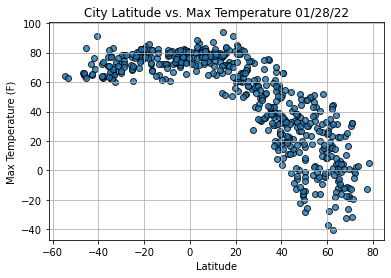

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

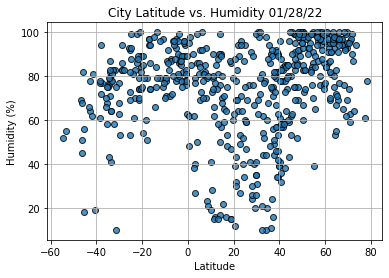

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

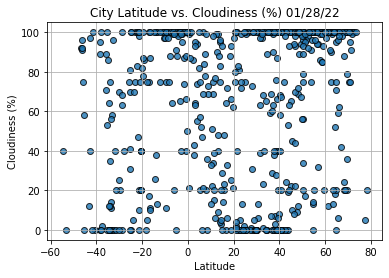

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

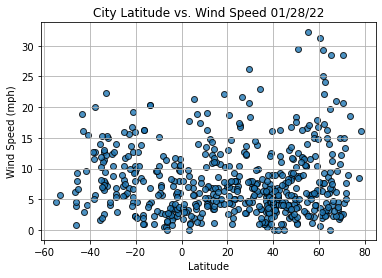

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gao,ML,2022-01-28 21:53:22,16.6362,1.6370,67.14,16,0,12.37
1,Jamestown,US,2022-01-28 21:51:08,42.0970,-79.2353,19.09,59,100,5.01
5,Sioux Lookout,CA,2022-01-28 21:53:24,50.1001,-91.9170,7.18,60,20,4.61
7,San Ramon,US,2022-01-28 21:49:39,37.7799,-121.9780,66.92,49,0,1.01
8,Bonthe,SL,2022-01-28 21:52:29,7.5264,-12.5050,79.16,82,78,5.99


In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [31]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gao,ML,2022-01-28 21:53:22,16.6362,1.6370,67.14,16,0,12.37
1,Jamestown,US,2022-01-28 21:51:08,42.0970,-79.2353,19.09,59,100,5.01
5,Sioux Lookout,CA,2022-01-28 21:53:24,50.1001,-91.9170,7.18,60,20,4.61
7,San Ramon,US,2022-01-28 21:49:39,37.7799,-121.9780,66.92,49,0,1.01
8,Bonthe,SL,2022-01-28 21:52:29,7.5264,-12.5050,79.16,82,78,5.99


In [32]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Buin,CL,2022-01-28 21:50:37,-33.7333,-70.7500,83.05,41,0,11.39
3,Ushuaia,AR,2022-01-28 21:49:56,-54.8000,-68.3000,64.06,52,40,4.61
4,Taltal,CL,2022-01-28 21:53:23,-25.4000,-70.4833,68.32,73,31,7.11
6,Saint-Philippe,RE,2022-01-28 21:53:24,-21.3585,55.7679,74.79,74,10,5.44
10,Busselton,AU,2022-01-28 21:51:12,-33.6500,115.3333,65.05,64,11,7.70


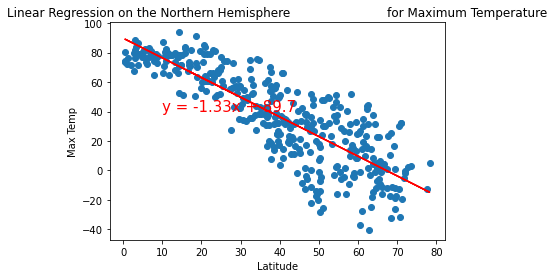

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


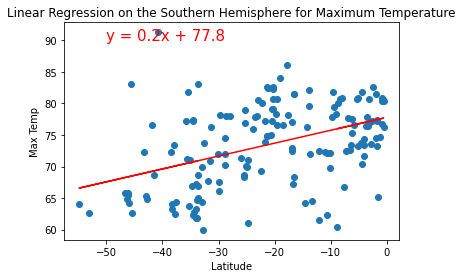

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


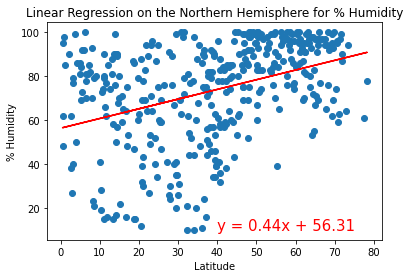

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

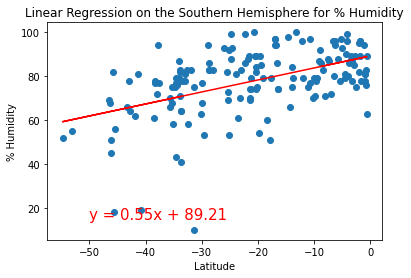

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

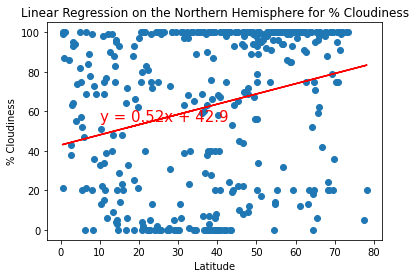

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

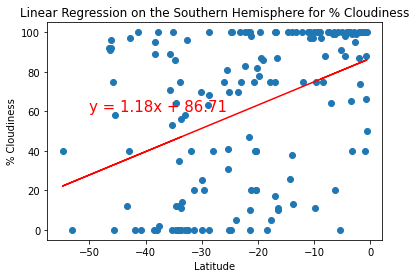

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

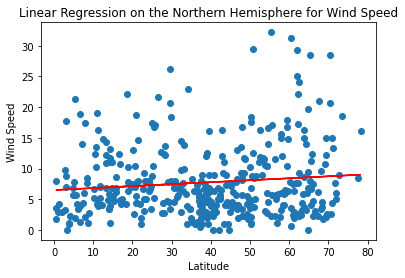

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

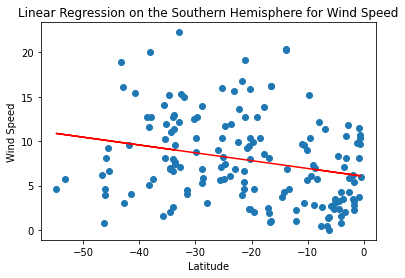

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
